### Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup=pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.rename(columns={'R&D Spend':'RD','Marketing Spend':'Marketing'},inplace=True)
startup.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RD                50 non-null float64
Administration    50 non-null float64
Marketing         50 non-null float64
State             50 non-null object
Profit            50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
startup.isna().sum()

RD                0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

## Correlation matrix

In [6]:
startup.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Scatterplot between variables along with histograms

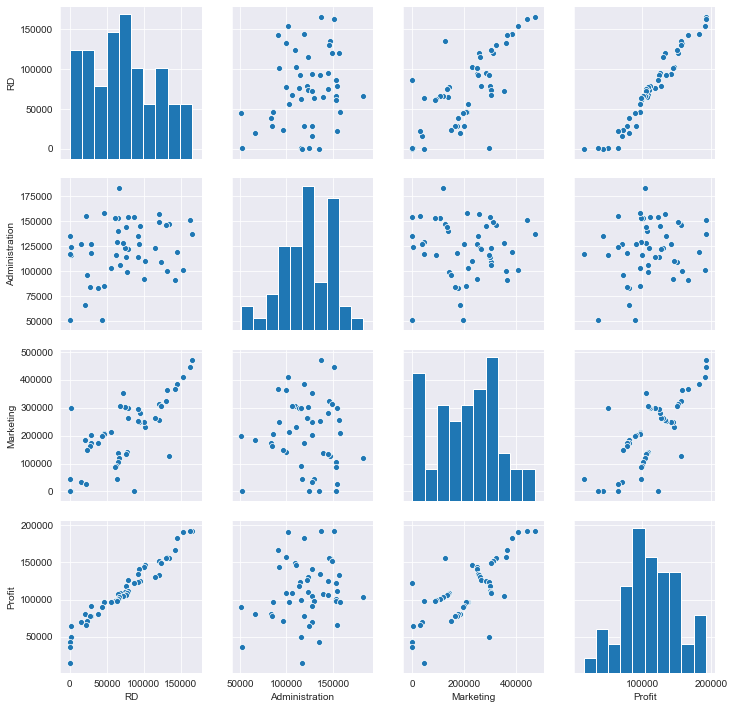

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

## Preparing a model

In [8]:
model=smf.ols('Profit~RD+Administration+Marketing+State',data=startup).fit()

In [9]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RD                       0.806023
Administration          -0.027004
Marketing                0.026980
dtype: float64

In [10]:
print(model.tvalues,'\n',model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RD                   17.368580
Administration       -0.517012
Marketing             1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD                   2.578772e-21
Administration       6.077373e-01
Marketing            1.226769e-01
dtype: float64


In [11]:
print(model.rsquared,'\n',model.rsquared_adj)

0.9507524843355148 
 0.945156175737278


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        23:21:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Simple Linear Regression Models

In [13]:
model_1=smf.ols('Profit~Administration',data=startup).fit()

In [14]:
print(model_1.tvalues,'\n',model_1.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
model_2=smf.ols('Profit~Marketing',data=startup).fit()

In [16]:
print(model_2.tvalues,'\n',model_2.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [17]:
model_3=smf.ols('Profit~RD',data=startup).fit()

In [18]:
print(model_3.tvalues,'\n',model_3.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [19]:
model_4=smf.ols('Profit~State',data=startup).fit()

In [20]:
print(model_4.tvalues,'\n',model_4.pvalues)

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


## Residual Analysis

### Test for normality of Residuals (Q-Q Plot)

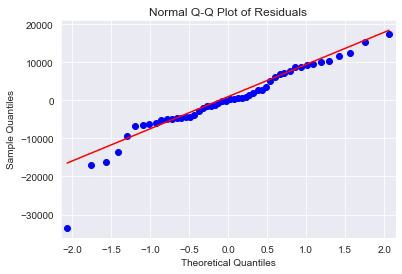

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values(vals):
    return ((vals-vals.mean())/vals.std())

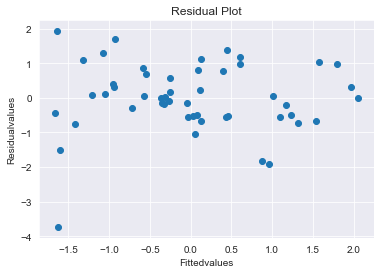

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Fittedvalues')
plt.ylabel('Residualvalues')
plt.show()

## Residual vs Regressors

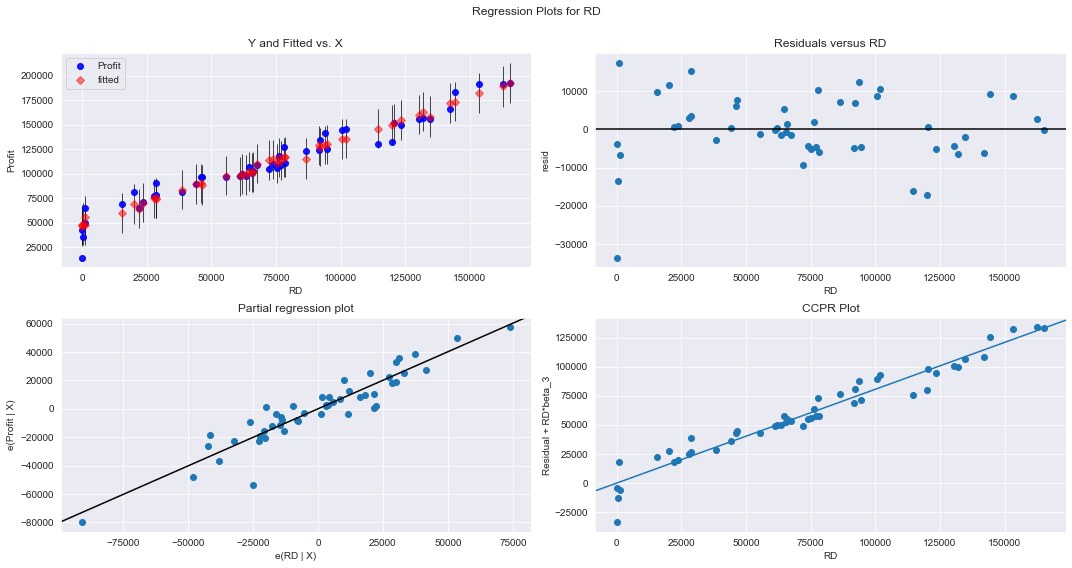

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

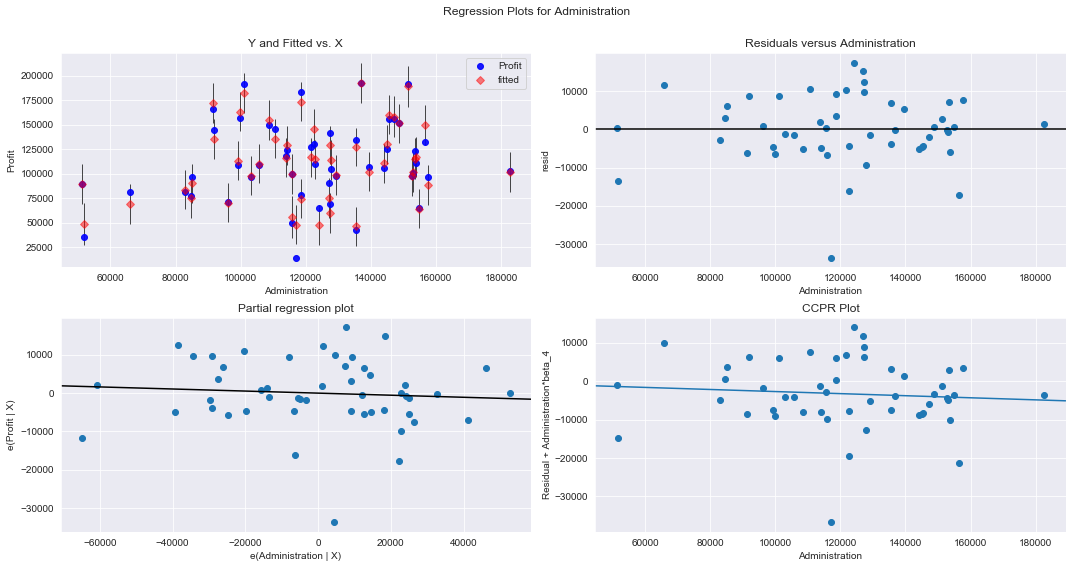

In [25]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

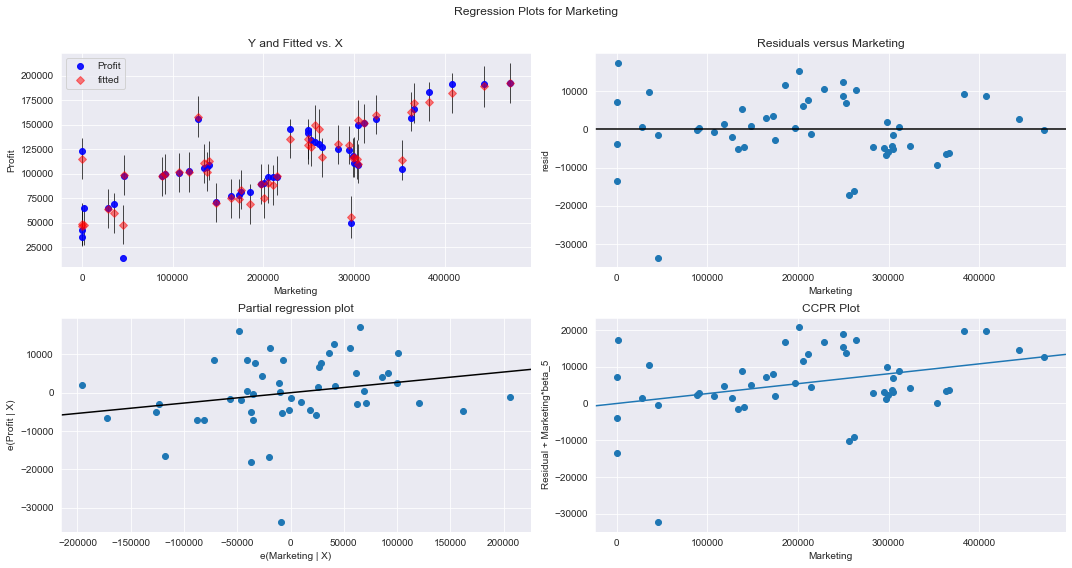

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)
plt.show()

## Model Deletion Diagnostics

## Deleting influencers/Outliers

### Cook's Distance

In [27]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


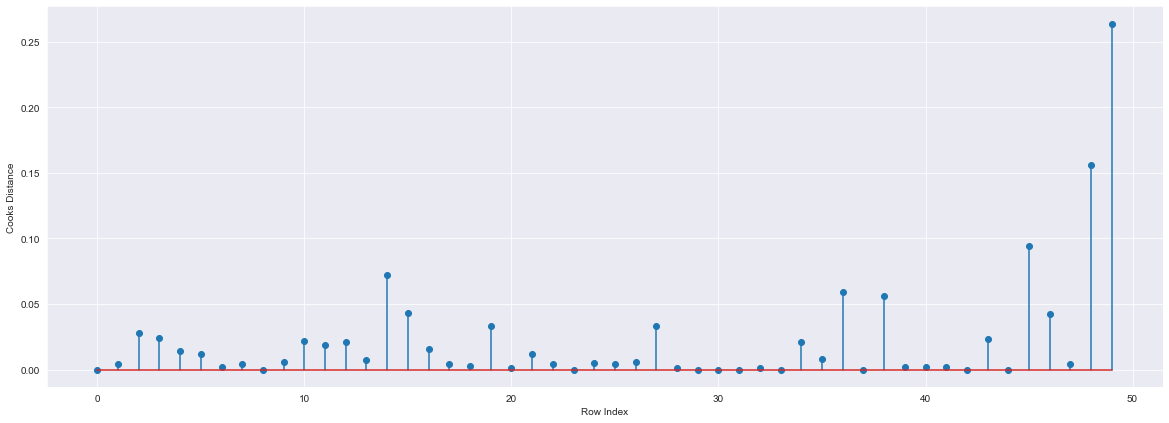

In [28]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

## High Influence Points

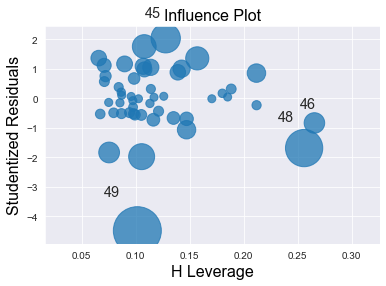

In [29]:
influence_plot(model)
plt.show()

In [30]:
startup_new=pd.read_csv('50_Startups.csv')

In [31]:
startup1=startup_new.drop(startup_new.index[[19,46,48,49]],axis=0).reset_index()

In [32]:
startup1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
startup1=startup1.drop(['index'],axis=1)

In [34]:
startup1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
startup1.rename(columns={'R&D Spend':'RD','Marketing Spend':'Marketing'},inplace=True)
startup1

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build Model

In [36]:
final_startup=smf.ols('Profit~RD+Marketing+Administration',data=startup1).fit()

In [37]:
final_startup.params

Intercept         57647.195196
RD                    0.749272
Marketing             0.031968
Administration       -0.052558
dtype: float64

In [38]:
final_startup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     357.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           6.40e-30
Time:                        23:25:34   Log-Likelihood:                -472.28
No. Observations:                  46   AIC:                             952.6
Df Residuals:                      42   BIC:                             959.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.765e+04   5928.026      9.725      0.000    4.57e+04    6.96e+04
RD                 0.7493      0.043     17.294      0.000       0.662       0.837
Marketing          0.0320      0.016      1.971      0.055      -0.001       0.065
Administration    -0.0526      0.044     -1.189      0.241      -0.142       0.037
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.547
Skew:                           0.063   Prob(JB):                        0.761
Kurtosis:                       2.481   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Since the pvalue of Profit~Administration>0.05, the variable Administration is insignificant.Therefore we build a model 
# without considering the Administration variable.

In [40]:
final_startup2=smf.ols('Profit~RD+Marketing',data=startup1).fit()

In [41]:
final_startup2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     530.9
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.89e-31
Time:                        23:25:37   Log-Likelihood:                -473.04
No. Observations:                  46   AIC:                             952.1
Df Residuals:                      43   BIC:                             957.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.12e+04   2407.038     21.272      0.000    4.63e+04    5.61e+04
RD             0.7289      0.040     18.226      0.000       0.648       0.810
Marketing      0.0392      0.015      2.594      0.013       0.009       0.070
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.261
Skew:                           0.032   Prob(JB):                        0.877
Kurtosis:                       2.636   Cond. No.                     5.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
data = {'MODEL':pd.Series(['model','final_startup','final_startup2']),
        "Rsquare":pd.Series([model.rsquared,final_startup.rsquared,final_startup2.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,Rsquare
0,model,0.950752
1,final_startup,0.962343
2,final_startup2,0.961076


In [43]:
# Therefore the model 'final_startup2' is considered as the better model with R^2=0.96 and with significant p values